In [46]:
# Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns

In [47]:
# Select just a few of these categories, and download the training and testing set.
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [48]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer(binary=True)
# Naive Bayes classifier for multinomial models.
mnb = BernoulliNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [49]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

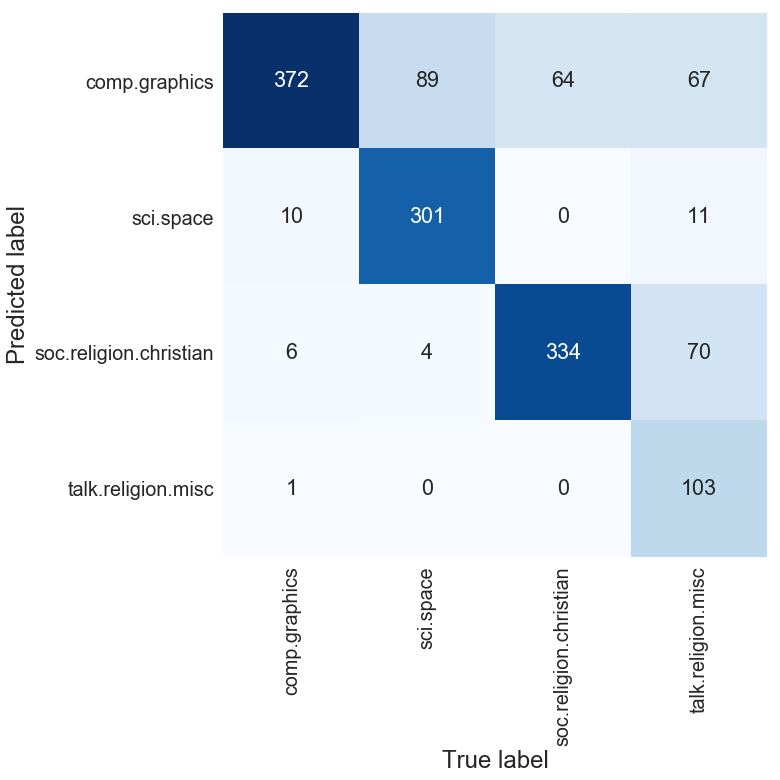

In [50]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(10,10))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
# Save figure
plt.savefig("confusion_matrix_text_classification.png", dpi=600)
plt.show()

In [34]:
# Utility function used to return the prediction for a single string.
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [35]:
predict_category('sending a payload to the ISS')

'comp.graphics'

In [36]:
predict_category('discussing islam vs atheism')

'comp.graphics'

In [37]:
predict_category('determining the screen resolution')

'comp.graphics'

In [38]:
predict_category('god is great')

'comp.graphics'

In [39]:
predict_category('allah')

'comp.graphics'